<a href="https://colab.research.google.com/github/PranavKamat06/phys152-2026/blob/main/Exercises/Homework-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Linear Algebra (20 points)

One of the challenges in machine learning is moving from the formal linear algebra formulation to a practical implementation with discrete vectors.

Let us look again at the NAND gate implementation with a single perceptron node.
The node has two inputs $x_1$ and $x_2$ and a single output.

The perceptron node implements a transformation between input $\vec{x}$ and output $y$ described by
$$y = f({\bf x}; {\bf w}, b) = {\bf w}^T {\bf x} + b.$$



## Describe the form of the input ${\bf x}$.

Is it a column vector
$\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$
 or a row vector
$\begin{bmatrix}
x_1
x_2
\end{bmatrix}$
 ? If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Describe the form of the weights ${\bf w}$.

Is it a square array or something else? If it were to be implemented as a PyTorch tensor, what should its dimensions be? Does your answer make sense in the equation above with ${\bf w}^T$?

## Describe the form of the bias $b$.

If it were to be implemented as a PyTorch tensor, what should its dimensions be?

## Calculate $y$ with weights and bias

Take $w_1=w_2=-2$ and $b=3$.
Then calculate the perceptron outputs for
- $y = f(x_1=0, x_2=0)$
- $y = f(x_1=0, x_2=1)$
- $y = f(x_1=1, x_2=0)$
- $y = f(x_1=1, x_2=1)$

What final piece is missing in this model, if the goal is produce a truth table with $y$ equal to 0 or 1?
Add the missing piece to your calculation to verify that this model has learned the NAND logic table.

# Answer:



The input vector $\textbf{x}$ is a column vector $\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$. In order for the map $\mathbf{x}\to{\mathbf{w}^T\mathbf{x}+b}$
to work, the product $\mathbf{w}^T\mathbf{x}$ must be a $1\times{1}$ tensor. Recall from linear algebra that the product of an $m\times{n}$ and a $n\times{k}$ matrix is an $m\times{k}$ matrix. Then, in order for $\mathbf{w}^T\mathbf{x}$ to be a $1\times{1}$ array, the input vector $\mathbf{x}$ must have a single column. Then, by process of elimination the input vector $\mathbf{x}$ must be a column vector $\mathbf{x}=\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$.

The weights $\mathbf{w}$ are, in this case, a $2\times{1}$ array described by the column vector $\mathbf{w}=\begin{bmatrix} w_1 \\ w_2 \end{bmatrix}$. This is because its transpose must operate on $\mathbf{x}$ to yield a scalar, and the only type of array that can do that is a $2\times{1}$ column vector, which has a transpose of dimension $1\times{2}$, and by the linear algebra described earlier, $\mathbf{w}^T\mathbf{x}$ is necessarily a $1\times{1}$ array. If we were to implement $\mathbf{w}$ through PyTorch, we would want to use a tensor of dimension $1$ and size $2$.

The bias $b$ is a scalar, or, equivalently, a rank zero tensor. If implemented as a torch tensor, its dimension would be zero.

In [ ]:
from IPython.core.display import Markdown
import torch
import numpy as np
import pandas as pd
# Initializing weights, bias, and input data.
w_1 = -2.0
w_2 = -2.0
b = 3.0
tuple_list = [[0,0],[0,1.0],[1.0,0],[1.0,1.0]]
tuple_tensor = torch.tensor(tuple_list)
w_tensor = torch.tensor([[w_1],[w_2]])
b_tensor = torch.tensor([b])
# Calculating y through pytorch operations.
y_tensor = torch.matmul(w_tensor.T,tuple_tensor.T) + b_tensor

# Below is the simplest command I could find in torch docs, torch.where().
# Calling torch.where() checks if each element of y_tensor is not equal to -1.
# An element of y_tensor will not have a value of -1 if at least one of x_1,x_2
# is not true, and so torch.where() effectively checks for the truth value of NAND.

nand_tensor = torch.where(y_tensor != -1,1,0)
nand_array = [((nand_tensor.numpy()).tolist())[0]][0]
data = {
    r'$x_1$': [0,0,1,1],
    r'$x_2$': [0,1,0,1],
    r'$x_1$ NAND $x_2$': (nand_array)
}

# I then tweaked the data type of the tensor holding the NAND truth values, and put
# it into pandas to render a truth table.

df = pd.DataFrame(data)
display(Markdown(df.to_markdown(index=False)))


|   $x_1$ |   $x_2$ |   $x_1$ NAND $x_2$ |
|--------:|--------:|-------------------:|
|       0 |       0 |                  1 |
|       0 |       1 |                  1 |
|       1 |       0 |                  1 |
|       1 |       1 |                  0 |

# Exercise 2: Linear Regression (40 points)

In this exercise we will use a simple perceptron (one node) to calculate the linear regression for the function $f(x) = y$.

In this exercise each data point has a single $x$ and a single $y$.

Fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [ ]:
import torch
from torch.autograd import Variable

x_data_tensor = torch.Tensor([[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]])
y_array = [0.2484659, 0.32902399, 0.54115681, 0.3084831,  0.5618252,  0.36455911,
 0.51350721, 0.59238188, 0.50134166, 0.83304367, 0.7044594,  0.86724902,
 0.8560783,  0.97976775, 0.97786013, 0.67360169, 0.94500984, 1.00788982,
 1.12242341, 1.17383408, 1.12468363, 1.13431148, 1.17662245, 1.3324501,
 1.23486871, 1.16412706, 1.36320016, 1.55521281, 1.38178904, 1.49117572,
 1.58999798, 1.7864531,  1.77436729, 1.72934819, 1.66198311, 1.79041017,
 2.20885834, 1.97323221, 2.1730214,  2.01557034, 2.19822747, 2.08018215,
 2.10432378, 2.13234159, 2.0252848,  2.36310875, 2.22574087, 2.21272699,
 2.35988945, 2.30726429, 2.65259961, 2.60177056, 2.82030711, 2.65299176,
 2.63965026, 2.59975554, 2.82430745, 2.81222783, 2.73346561, 2.80687846,
 2.96686021, 3.01237272, 3.12654109, 3.10471933, 3.01646611, 3.22289136,
 3.28936654, 3.05285429, 3.23316291, 3.39834175, 3.42476185, 3.29001894,
 3.43420673, 3.50978013, 3.60845387, 3.75540575, 3.70630173, 3.68288956,
 3.95154621, 3.66087953, 3.9726395,  4.06565774, 4.14370104, 3.86052788,
 4.00409922, 4.08683924, 4.02585529, 4.37126455, 4.19095016, 4.38038983,
 4.32872869, 4.59454492, 4.49190972, 4.4209342,  4.42530996, 4.6364482,
 4.61110624, 4.63337463, 4.73420358, 4.50500814]

# We convert the array to a tensor, and then reshape it to the same type of tensor as x_data_tensor.
y_data_tensor = (torch.Tensor([y_array])).reshape(-1,1)

# We then verify that the two tensors have the same shape:
print(x_data_tensor.shape)
print(y_data_tensor.shape)

torch.Size([100, 1])
torch.Size([100, 1])


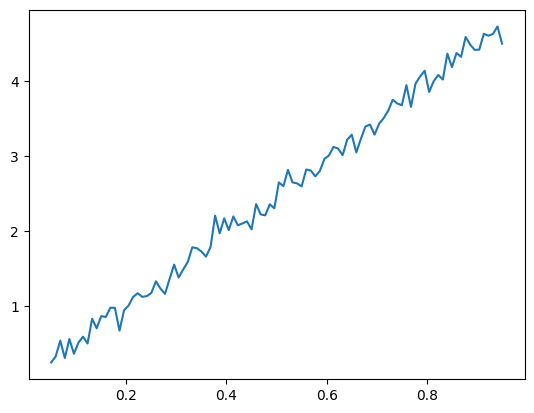

In [ ]:
# I first plotted the data to get a sense of what I'm working with.
import matplotlib.pyplot as plt
x_array = [[0.0500],[0.0591],[0.0682],[0.0773],[0.0864],
        [0.0955],[0.1045],[0.1136],[0.1227],[0.1318],
        [0.1409],[0.1500],[0.1591],[0.1682],[0.1773],
        [0.1864],[0.1955],[0.2045],[0.2136],[0.2227],
        [0.2318],[0.2409],[0.2500],[0.2591],[0.2682],
        [0.2773],[0.2864],[0.2955],[0.3045],[0.3136],
        [0.3227],[0.3318],[0.3409],[0.3500],[0.3591],
        [0.3682],[0.3773],[0.3864],[0.3955],[0.4045],
        [0.4136],[0.4227],[0.4318],[0.4409],[0.4500],
        [0.4591],[0.4682],[0.4773],[0.4864],[0.4955],
        [0.5045],[0.5136],[0.5227],[0.5318],[0.5409],
        [0.5500],[0.5591],[0.5682],[0.5773],[0.5864],
        [0.5955],[0.6045],[0.6136],[0.6227],[0.6318],
        [0.6409],[0.6500],[0.6591],[0.6682],[0.6773],
        [0.6864],[0.6955],[0.7045],[0.7136],[0.7227],
        [0.7318],[0.7409],[0.7500],[0.7591],[0.7682],
        [0.7773],[0.7864],[0.7955],[0.8045],[0.8136],
        [0.8227],[0.8318],[0.8409],[0.8500],[0.8591],
        [0.8682],[0.8773],[0.8864],[0.8955],[0.9045],
        [0.9136],[0.9227],[0.9318],[0.9409],[0.9500]]
plt.plot(x_array,y_array)
plt.show()



In [ ]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

our_model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.15)

In [ ]:
for epoch in range(5000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = our_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 7.1291327476501465
epoch 1, loss 3.2716028690338135
epoch 2, loss 1.7687491178512573
epoch 3, loss 1.1735628843307495
epoch 4, loss 0.9285754561424255
epoch 5, loss 0.819008469581604
epoch 6, loss 0.762103796005249
epoch 7, loss 0.7259630560874939
epoch 8, loss 0.6982824206352234
epoch 9, loss 0.6743068099021912
epoch 10, loss 0.6521899700164795
epoch 11, loss 0.6312066912651062
epoch 12, loss 0.6110641360282898
epoch 13, loss 0.5916361212730408
epoch 14, loss 0.5728616714477539
epoch 15, loss 0.5547049641609192
epoch 16, loss 0.5371401906013489
epoch 17, loss 0.5201460719108582
epoch 18, loss 0.5037032961845398
epoch 19, loss 0.4877936542034149
epoch 20, loss 0.4723997116088867
epoch 21, loss 0.4575046896934509
epoch 22, loss 0.4430924654006958
epoch 23, loss 0.429147332906723
epoch 24, loss 0.4156542122364044
epoch 25, loss 0.4025983512401581
epoch 26, loss 0.3899657428264618
epoch 27, loss 0.3777425289154053
epoch 28, loss 0.365915447473526
epoch 29, loss 0.35447165369

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

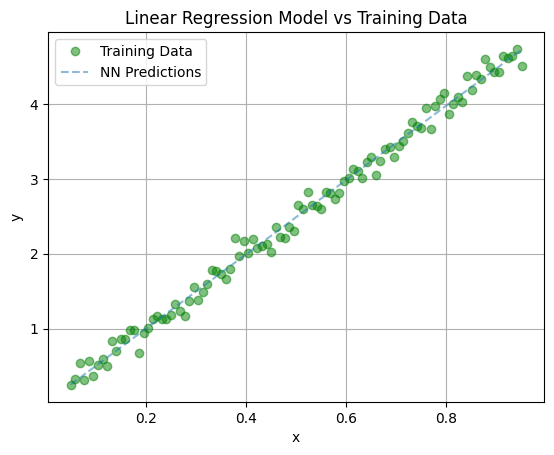

In [ ]:
from matplotlib import pyplot as plt, rcParams
predicted = our_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.title("Linear Regression Model vs Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.8$
- $x=1.5$

In [ ]:
# We initialize our input and evaluate our model on it.
pred_input = torch.tensor([[-0.2],[0.8],[1.5]])
pred_output = our_model(pred_input)

# We convert the output tensor pred_output to a list of 3 elements suitable for our dataframe.
pred_output_list = test_list = [item for sublist in ((pred_output.detach()).numpy()) for item in sublist]
data = {r'$x$' : [-0.2, 0.8, 1.5], r'$y_{pred}$' : pred_output_list}
df = pd.DataFrame(data)
display(Markdown(df.to_markdown(index=False)))




|   $x$ |   $y_{pred}$ |
|------:|-------------:|
|  -0.2 |    -0.988879 |
|   0.8 |     3.97878  |
|   1.5 |     7.45614  |

# Exercise 3: Perceptron (40 points)

In this exercise we will use a multi-layer perceptron to learn a non-linear function $y=f(x)$.

You are given the $x$ and $y$ data, and the task is to produce a machine learning model that can predict $y$ for any given $x$.

As for Exercise 2, fill in the code blocks below to model the regression and predict the output for some test $x$ values.
(Look for the comments marked "TO-DO.")


In [ ]:
import torch
from torch.autograd import Variable
x_data_tensor = torch.tensor([
    [0.0500], [0.0591], [0.0682], [0.0773], [0.0864],
    [0.0955], [0.1045], [0.1136], [0.1227], [0.1318],
    [0.1409], [0.1500], [0.1591], [0.1682], [0.1773],
    [0.1864], [0.1955], [0.2045], [0.2136], [0.2227],
    [0.2318], [0.2409], [0.2500], [0.2591], [0.2682],
    [0.2773], [0.2864], [0.2955], [0.3045], [0.3136],
    [0.3227], [0.3318], [0.3409], [0.3500], [0.3591],
    [0.3682], [0.3773], [0.3864], [0.3955], [0.4045],
    [0.4136], [0.4227], [0.4318], [0.4409], [0.4500],
    [0.4591], [0.4682], [0.4773], [0.4864], [0.4955],
    [0.5045], [0.5136], [0.5227], [0.5318], [0.5409],
    [0.5500], [0.5591], [0.5682], [0.5773], [0.5864],
    [0.5955], [0.6045], [0.6136], [0.6227], [0.6318],
    [0.6409], [0.6500], [0.6591], [0.6682], [0.6773],
    [0.6864], [0.6955], [0.7045], [0.7136], [0.7227],
    [0.7318], [0.7409], [0.7500], [0.7591], [0.7682],
    [0.7773], [0.7864], [0.7955], [0.8045], [0.8136],
    [0.8227], [0.8318], [0.8409], [0.8500], [0.8591],
    [0.8682], [0.8773], [0.8864], [0.8955], [0.9045],
    [0.9136], [0.9227], [0.9318], [0.9409], [0.9500]
])
y_data_tensor = torch.tensor([
    [ 1.7583], [ 1.7594], [ 1.8341], [ 1.6776], [ 1.6192],
    [ 1.6319], [ 1.2830], [ 1.4240], [ 1.2310], [ 1.1797],
    [ 1.1209], [ 1.0473], [ 0.9846], [ 0.8850], [ 0.5541],
    [ 0.6185], [ 0.3247], [ 0.2793], [ 0.2393], [ 0.1914],
    [-0.1365], [-0.3595], [-0.4752], [-0.5761], [-0.7215],
    [-0.6921], [-0.9243], [-0.8667], [-0.8986], [-1.0227],
    [-1.3271], [-1.2883], [-1.4789], [-1.4397], [-1.5957],
    [-1.6669], [-1.6963], [-1.5355], [-1.8969], [-1.8468],
    [-1.9558], [-2.1036], [-2.0511], [-2.0254], [-2.0736],
    [-2.1414], [-2.1034], [-1.8813], [-1.9003], [-1.8852],
    [-1.7806], [-1.8672], [-1.6624], [-1.7309], [-1.6294],
    [-1.4354], [-1.3698], [-1.3055], [-1.2557], [-1.0780],
    [-1.0991], [-0.9720], [-0.6129], [-0.6491], [-0.5295],
    [-0.3640], [-0.2636], [-0.0167], [ 0.0487], [ 0.0429],
    [ 0.1645], [ 0.2342], [ 0.2722], [ 0.6613], [ 0.6190],
    [ 0.8127], [ 1.0884], [ 1.1002], [ 1.0179], [ 1.3273],
    [ 1.2551], [ 1.3914], [ 1.6677], [ 1.5505], [ 1.6793],
    [ 1.6582], [ 1.7866], [ 1.9044], [ 1.8406], [ 1.9540],
    [ 2.0823], [ 2.0165], [ 1.8276], [ 1.9111], [ 2.0306],
    [ 2.2018], [ 1.9585], [ 1.9884], [ 1.8752], [ 1.8503]
])

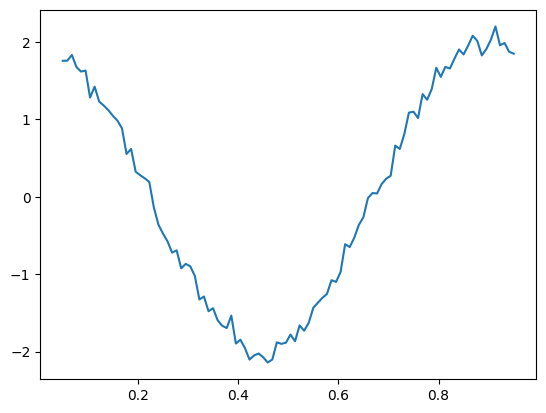

In [ ]:
# Again, we plot the data to get an idea of the relationship between the variables.
# The data seems to be roughly quadratic with a vertex at x = 0.45. Equivalently,
# it could be part of a sine wave with periodicity of 1.
plt.plot(x_data_tensor,y_data_tensor)
plt.show()

Check the model being constructed.
What do you think is the best architecture to learn this dataset?
(You can change your mind later.)

In [ ]:
from torch import nn, optim
complex_model = nn.Sequential(
     nn.Linear(1, 5),
     nn.Tanh(),
     nn.Linear(5, 5),
     nn.Tanh(),
     nn.Linear(5, 1)
)

criterion = nn.MSELoss()
optimizer = optim.SGD(complex_model.parameters(), lr=0.01)

# I tried several architectuers and learning rates/ number of epochs, and eventually found that a sandwiched
# hyperbolic tangent layer had the lowest loss rate. Some others which I tried that did not yield
# good loss functions were a sandwiched sigmoid layer, and some ReLU sequences. The sandwiched tanh layer yielded a slightly lower
# loss function value than a single sigmoid layer.

In [ ]:
for epoch in range(200000):
    # Forward pass: Compute predicted y by passing x to the model
    pred_y = complex_model(x_data_tensor)
    loss = criterion(pred_y, y_data_tensor)

    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 500 == 0:
      print('epoch {}, loss {}'.format(epoch, loss.item()))
# Running 1 million epochs got the loss down to 0.0077137 but took 6 minutes to complete.

epoch 0, loss 2.0214946269989014
epoch 500, loss 1.9798692464828491
epoch 1000, loss 1.8968558311462402
epoch 1500, loss 1.7491486072540283
epoch 2000, loss 1.4285359382629395
epoch 2500, loss 1.1464810371398926
epoch 3000, loss 0.7329216599464417
epoch 3500, loss 0.10399100929498672
epoch 4000, loss 0.024065710604190826
epoch 4500, loss 0.014202574267983437
epoch 5000, loss 0.012119995430111885
epoch 5500, loss 0.011423328891396523
epoch 6000, loss 0.011117692105472088
epoch 6500, loss 0.010969686321914196
epoch 7000, loss 0.010893916711211205
epoch 7500, loss 0.010852167382836342
epoch 8000, loss 0.010826525278389454
epoch 8500, loss 0.010808579623699188
epoch 9000, loss 0.010794397443532944
epoch 9500, loss 0.010782060213387012
epoch 10000, loss 0.010770747438073158
epoch 10500, loss 0.010760034434497356
epoch 11000, loss 0.0107496939599514
epoch 11500, loss 0.01073968131095171
epoch 12000, loss 0.010729899629950523
epoch 12500, loss 0.01072024181485176
epoch 13000, loss 0.010710758

## Plot the output from your regression model over the same domain as the training data.

Does it make sense? If not, update the training procedure parameters until you are satisfied with the regression model.

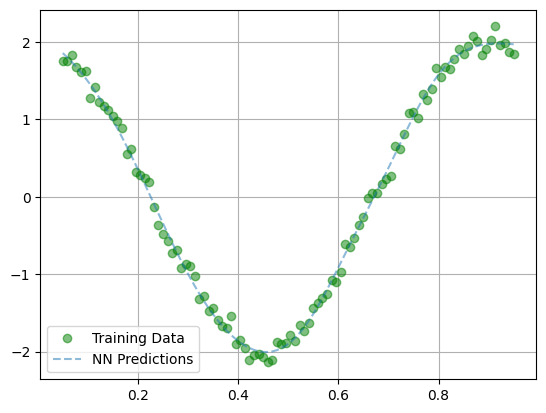

In [ ]:
from matplotlib import pyplot as plt, rcParams
predicted = complex_model(x_data_tensor)
plt.plot(x_data_tensor, y_data_tensor, 'go', label='Training Data', alpha=0.5)
plt.plot(x_data_tensor, Variable(predicted), '--', label='NN Predictions', alpha=0.5)
plt.legend(loc='best')
plt.grid()
plt.show()

## Now test on some sample $x$ values

What are the predicted $y$ values for the following?
- $x=-0.2$
- $x=0.4$
- $x=0.8$

In [ ]:
poly_input = torch.tensor([[-0.2],[0.4],[0.8]])
poly_output = complex_model(poly_input)
poly_output_list = [item for sublist in ((poly_output.detach()).numpy()) for item in sublist]
poly_input_list = [item for sublist in ((poly_input.detach()).numpy()) for item in sublist]
data = {r'$x$' : poly_input_list, r'$y_{pred}$' : poly_output_list}
df = pd.DataFrame(data)
display(Markdown(df.to_markdown(index=False)))

|   $x$ |   $y_{pred}$ |
|------:|-------------:|
|  -0.2 |      2.48982 |
|   0.4 |     -1.86329 |
|   0.8 |      1.58007 |